<a href="https://colab.research.google.com/github/Sanjay7127/OASIS_INTERNSHIP/blob/main/OASIS_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-3 : CAR PRICE PREDICTION WITH MACHINE LEARNING

    Author : Prakash sanjay palani
    Batch : January phase 1 AICTE OIB-SIP 2025
    Domain : Data Science

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
cars_data = pd.read_csv('cardetails.zip')

In [ ]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cars_data.shape

(301, 9)

In [ ]:
cars_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
cars_data.dropna(inplace=True)

In [ ]:
cars_data.shape

(301, 9)

In [ ]:
cars_data.duplicated().sum()

2

In [ ]:
cars_data.shape

(301, 9)

In [ ]:
cars_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
for col in cars_data.columns:
    print(f"{col}: {cars_data[col].unique()}")

Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

In [ ]:
def get_brand_name(car_name):
    car_name = car_name.split()
    return car_name[0]

In [ ]:
get_brand_name('Maruti Suzuki')

'Maruti'

In [ ]:
cars_data['Car_Name'] = cars_data['Car_Name'].apply(get_brand_name)

In [ ]:
cars_data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [ ]:
if 'Driven_kms' in cars_data.columns:
    pass
else:
    print("Column 'Driven_kms' not found in the DataFrame.")

In [ ]:
if 'Fuel_Type' in cars_data.columns:
    pass
else:
    print("Column 'Fuel_Type' not found in the DataFrame.")

In [ ]:
if 'Selling_type' in cars_data.columns:
    pass
else:
    print("Column 'Selling_type' not found in the DataFrame.")

In [ ]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("=======================")

Unique values of Car_Name
['ritz' 'sx4' 'ciaz' 'wagon' 'swift' 'vitara' 's' 'alto' 'ertiga' 'dzire'
 'ignis' '800' 'baleno' 'omni' 'fortuner' 'innova' 'corolla' 'etios'
 'camry' 'land' 'Royal' 'UM' 'KTM' 'Bajaj' 'Hyosung' 'Mahindra' 'Honda'
 'Yamaha' 'TVS' 'Hero' 'Activa' 'Suzuki' 'i20' 'grand' 'i10' 'eon' 'xcent'
 'elantra' 'creta' 'verna' 'city' 'brio' 'amaze' 'jazz']
Unique values of Year
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
Unique values of Selling_Price
[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    

In [ ]:
cars_data['Car_Name'].replace(['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splender iSmart' 'Activa 3g'
 'Hero Passion Pro' 'Honda CB Trigger' 'Yamaha FZ S '
 'Bajaj Pulsar 135 LS' 'Activa 4g' 'Honda CB Unicorn'
 'Hero Honda CBZ extreme' 'Honda Karizma' 'Honda Activa 125' 'TVS Jupyter'
 'Hero Honda Passion Pro' 'Hero Splender Plus' 'Honda CB Shine'
 'Bajaj Discover 100' 'Suzuki Access 125' 'TVS Wego' 'Honda CB twister'
 'Hero Glamour' 'Hero Super Splendor' 'Bajaj Discover 125' 'Hero Hunk'
 'Hero  Ignitor Disc' 'Hero  CBZ Xtreme' 'Bajaj  ct 100' 'i20' 'grand i10'
 'i10' 'eon' 'xcent' 'elantra' 'creta' 'verna' 'city' 'brio' 'amaze'
 'jazz'], inplace=True)

<ipython-input-76-1b720d8dea35>:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  cars_data['Car_Name'].replace(['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
<ipython-input-76-1b720d8dea35>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['Car_Name'].replace(['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'


In [ ]:
print(cars_data.columns)

if 'Transmission' in cars_data.columns:
    print(cars_data['Transmission'].unique())
else:
    print("Column 'Transmission' or similar not found in DataFrame.")

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')
['Manual' 'Automatic']


In [ ]:
cars_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1}}, inplace=True)

In [ ]:
cars_data.replace({'Transmission':{'Manual', 'Automatic'}}, inplace=True)

In [ ]:
cars_data.reset_index(drop=True, inplace=True)

In [ ]:
cars_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [ ]:
cars_data['Owner'].unique()

array([0, 1, 3])

In [ ]:
cars_data['Owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}, inplace=True)

<ipython-input-83-b5eb801ab962>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['Owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}, inplace=True)


In [ ]:
cars_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols('Selling_Price ~ Present_Price + Driven_kms', data=cars_data)

results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     581.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.47e-103
Time:                        16:48:45   Log-Likelihood:                -676.82
No. Observations:                 301   AIC:                             1360.
Df Residuals:                     298   BIC:                             1371.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3300      0.206      6.461

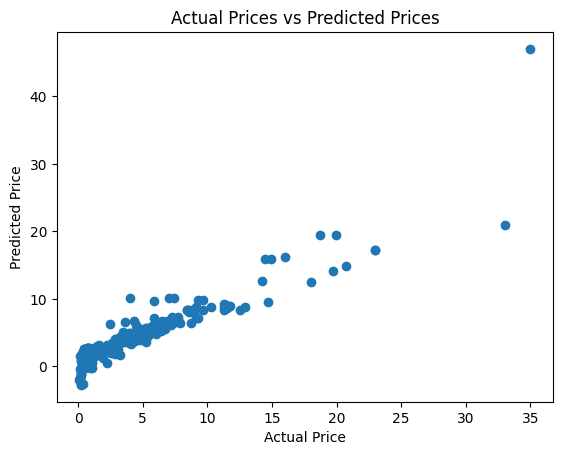

In [ ]:
import matplotlib.pyplot as plt

training_data_prediction = model.predict(X_train)

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
error_score = mean_squared_error(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  3.038508624473148


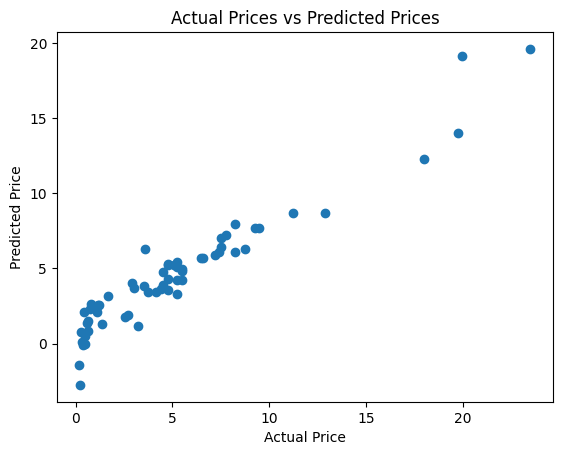

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X = cars_data.drop('Selling_Price', axis=1)
y = cars_data['Selling_Price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print("Coefficients:", lasso_model.coef_)

Mean Squared Error: 2.418850831488406
Coefficients: [ 4.18809024e-01  4.67377800e-01 -3.43826635e-06 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.17090577e+00
 -0.00000000e+00 -5.59835151e-01 -1.17870405e-01]


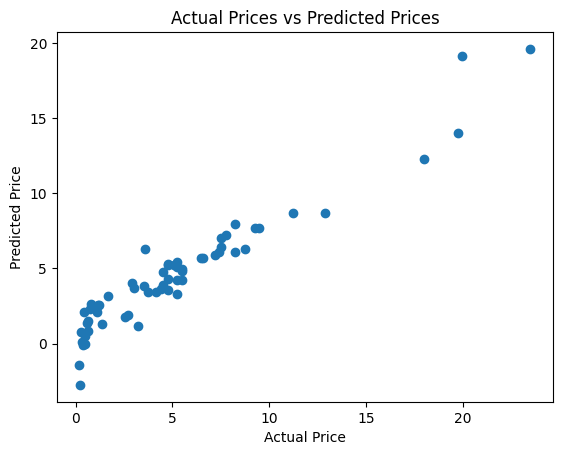

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()